Mapping the historical range of the Mongolian and Roman empires to highlight the use of polygons in Python maps.

In [1]:
import geopandas as gpd

In [2]:
roman_empire = gpd.read_file("roman_empire.geojson")
mongol_empire = gpd.read_file("mongol_empire.geojson")

Now load in modern day country boundaries from Natural Earth. Converts the polygons to LineStrings here

In [17]:
df = gpd.read_file("../map2_lines/natural_earth/ne_10m_admin_0_countries.shp")
df = df[df['CONTINENT'] != 'Antarctica']  # select everything that isn't antarctica.
df['boundary'] = df.geometry.boundary
df['geometry'] = df['boundary'].copy()


Plot the empires in pyplot

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

(np.float64(-20037508.342789244),
 np.float64(20037508.342789244),
 np.float64(-9578076.91334669),
 np.float64(18764656.231380563))

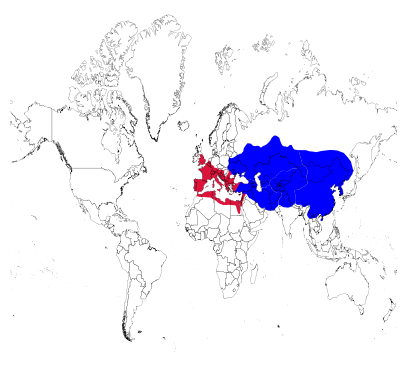

In [29]:
# Create the figure and axes, set the projection to mercator in cartopy (transform from plate carree as a known start point).
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()},
                      figsize=(5,5))
# Add the data to the plot with proper transform
df.plot(ax=ax, transform=ccrs.PlateCarree(), color='black', lw=0.1)

roman_empire.plot(ax=ax, transform=ccrs.PlateCarree(), color='crimson')
mongol_empire.plot(ax=ax, transform=ccrs.PlateCarree(), color='blue')

ax.axis('off')

Now it's possible to isolate the parts of these two empires that overlap using spatial relationships in GeoPandaas.

(np.float64(-20037508.342789244),
 np.float64(20037508.342789244),
 np.float64(-9578076.91334669),
 np.float64(18764656.231380563))

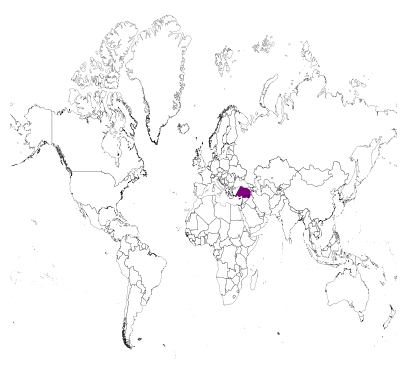

In [31]:
# union = roman_empire.overlay(mongol_empire, how='union')
# difference = roman_empire.overlay(mongol_empire, how='difference')
# symmetric_difference = roman_empire.overlay(mongol_empire, how='symmetric_difference')
intersection = roman_empire.overlay(mongol_empire, how='intersection') # Focus on this one for now - Showing the overlap of empires

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()},
                      figsize=(5,5))
# Add the data to the plot with proper transform
df.plot(ax=ax, transform=ccrs.PlateCarree(), color='black', lw=0.1)

# union.plot(ax=ax, transform=ccrs.PlateCarree(), color='purple')
intersection.plot(ax=ax, transform=ccrs.PlateCarree(), color='purple')

ax.axis('off')

Now to combine them all, plotting the intersection last so it shows on top in purple:

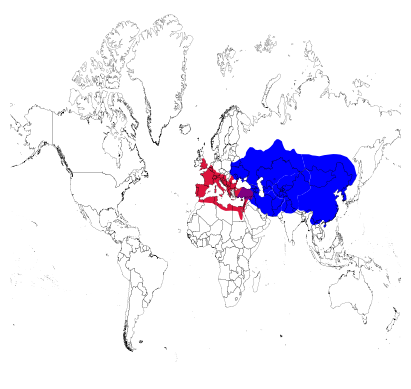

In [39]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
# Add the data to the plot with proper transform
df.plot(ax=ax, transform=ccrs.PlateCarree(), color='black', lw=0.1)

roman_empire.plot(ax=ax, transform=ccrs.PlateCarree(), color='crimson')
mongol_empire.plot(ax=ax, transform=ccrs.PlateCarree(), color='blue')
intersection.plot(ax=ax, transform=ccrs.PlateCarree(), color='purple')

ax.axis('off')
plt.savefig('map3_blp.png', dpi=300)

# alternative is to save as a pdf instead and then use this in the terminal:
# pdftoppm -png -r 300 filename.pdf filename